In [2]:
import os
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from worlds.worlds import CSTR

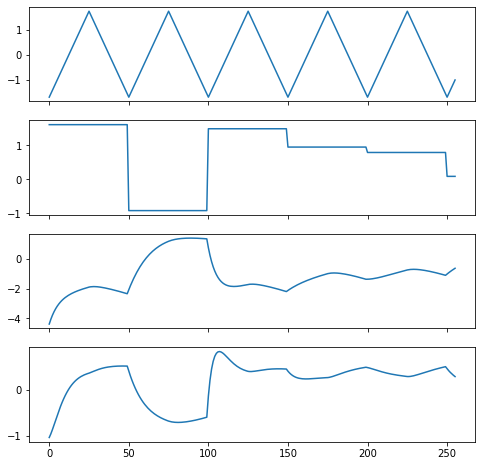

In [4]:
params_nom = {'C_A0': 0.8,
              'k0_list': [1.0, 0.7, 0.1, 0.006],
              'E': [8.33, 10.0, 50.0, 83.3]}
system_nom = CSTR(params=params_nom)  # nominal system
# Generate train and test datasets
batch_size = 64
n_steps = 256
u_train, u_test, y_train, y_test = system_nom.generate_data(batch_size, n_steps, flow_period=50)
# Compute rescaling factors using the training data
u_mean = np.mean(np.mean(u_train, axis=1), axis=0)
u_std = np.mean(np.std(u_train, axis=1), axis=0)
y_mean = np.mean(np.mean(y_train, axis=1), axis=0)
y_std = np.mean(np.std(y_train, axis=1), axis=0)

# Rescale variables
u_train = (u_train - u_mean)/u_std
u_test = (u_test - u_mean) / u_std
y_train = (y_train - y_mean)/u_std
y_test = (y_test - y_mean) / u_std
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(8,8))
ax[0].plot(u_train[0, :, 0])  # q
ax[1].plot(u_train[0, :, 1])  # T
ax[2].plot(y_train[0, :, 0])  # Ca
ax[3].plot(y_train[0, :, 1])  # Cr


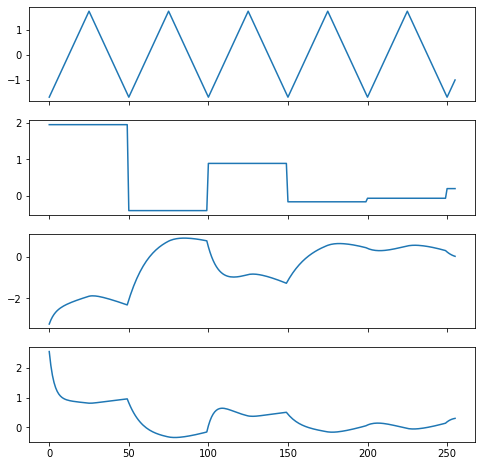

In [5]:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(8,8))
ax[0].plot(u_train[1, :, 0])  # q
ax[1].plot(u_train[1, :, 1])  # T
ax[2].plot(y_train[1, :, 0])  # Ca
ax[3].plot(y_train[1, :, 1])  # Cr

In [6]:
u_train.shape, y_train.shape

((64, 256, 2), (64, 256, 2))

In [9]:
np.concatenate((u_train, y_train), axis=2).shape

(64, 256, 4)

In [11]:
u_mean = np.mean(np.mean(u_train, axis=1), axis=0)
u_std = np.mean(np.std(u_train, axis=1), axis=0)
u_mean.shape

(2,)

In [15]:
params_pert = {'C_A0': 0.75,
               'k0_list': [1.0, 0.7, 0.1, 0.006],
               'E': [7.33, 9.0, 60.0, 93.3]}
system_pert = CSTR(params=params_pert)  # perturbed system
# Generate transfer and evaluation datasets
batch_size = 15
n_steps = 1024
u_transf, u_eval, y_transf, y_eval = system_pert.generate_data(batch_size, n_steps, flow_period=50)
# Rescale variables
u_transf = (u_transf - u_mean) / u_std
u_eval = (u_eval - u_mean) / u_std
y_transf = (y_transf - y_mean) / y_std
y_eval = (y_eval - y_mean) / y_std
fig, ax = plt.subplots(4, 1, sharex=True)
ax[0].plot(u_transf[0, :, 0])  # q
ax[1].plot(u_transf[0, :, 1])  # T
ax[2].plot(y_transf[0, :, 0])  # Ca
ax[3].plot(y_transf[0, :, 1])  # Cr
np.save(os.path.join("data", "cstr", "u_transf.npy"), u_transf)
np.save(os.path.join("data", "cstr", "u_eval.npy"), u_eval)
np.save(os.path.join("data", "cstr", "y_transf.npy"), y_transf)
np.save(os.path.join("data", "cstr", "y_eval.npy"), y_eval)

KeyboardInterrupt: 

In [10]:
u_eval.shape, y_eval.shape

((15, 1024, 2), (15, 1024, 2))

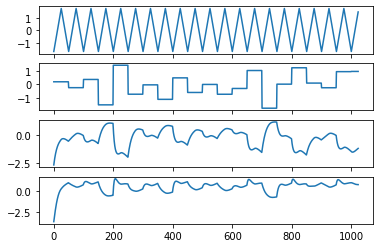

In [12]:
def plot(series_idx: int = 0):
    fig, ax = plt.subplots(4, 1, sharex=True)
    ax[0].plot(u_eval[series_idx, :, 0])  # q
    ax[1].plot(u_eval[series_idx, :, 1])  # T
    ax[2].plot(y_eval[series_idx, :, 0])  # Ca
    ax[3].plot(y_eval[series_idx, :, 1])  # Cr

plot(0)

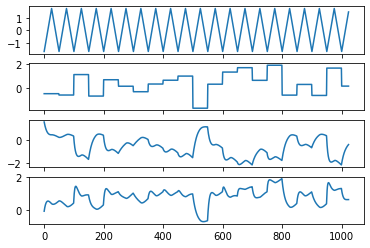

In [14]:
plot(6)